In [168]:
import pandas as pd
import pylab
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import  ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [169]:
df=pd.read_csv("/Users/qiuchenlu/Downloads/MLF_GP2_EconCycle.csv")
df = df.drop(['Date', 'USPHCI'], axis = 1)

# Exploratory Data Analysis

In [279]:
df.head()

,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
0,10.410,9.860,9.500,9.200,9.140,9.100,9.750,9.950,10.010,0.937,0.956,0.962,0.011,0.018,0.024
1,10.240,9.720,9.290,9.130,9.110,9.100,9.740,9.900,9.960,0.951,0.967,0.973,0.009,0.015,0.021
2,10.250,9.790,9.380,9.200,9.150,9.120,9.720,9.850,9.870,0.948,0.961,0.963,0.010,0.015,0.020
3,10.120,9.780,9.430,9.250,9.210,9.180,9.860,9.950,9.980,0.974,0.983,0.986,0.007,0.013,0.017
4,10.120,9.780,9.420,9.240,9.230,9.250,9.770,9.760,9.710,0.965,0.964,0.959,0.006,0.011,0.016


In [278]:
df.iloc[:,:].describe()

,T1Y Index,T2Y Index,T3Y Index,T5Y Index,T7Y Index,T10Y Index,CP1M,CP3M,CP6M,CP1M_T1Y,CP3M_T1Y,CP6M_T1Y,PCT 3MO FWD,PCT 6MO FWD,PCT 9MO FWD
count,223.000,223.000,223.000,223.000,223.000,223.000,223.000,223.000,223.000,223.000,223.000,223.000,223.000,223.000,223.000
mean,8.031,8.411,8.564,8.809,8.980,9.073,7.942,7.937,7.893,0.982,0.984,0.983,0.007,0.014,0.021
std,3.159,2.954,2.820,2.648,2.543,2.448,3.405,3.329,3.181,0.086,0.077,0.067,0.005,0.009,0.013
min,3.180,3.840,4.170,4.710,5.050,5.330,3.110,3.140,3.190,0.718,0.714,0.698,-0.007,-0.010,-0.012
25%,5.735,6.180,6.410,6.695,6.965,7.175,5.605,5.645,5.635,0.934,0.940,0.945,0.006,0.011,0.014
50%,7.670,8.000,8.130,8.330,8.520,8.610,7.730,7.720,7.620,0.973,0.978,0.980,0.008,0.016,0.024
75%,9.840,10.075,10.375,10.525,10.640,10.685,9.345,9.345,9.300,1.033,1.026,1.016,0.010,0.020,0.029
max,16.720,16.460,16.220,15.930,15.650,15.320,18.950,18.070,16.660,1.339,1.277,1.220,0.020,0.037,0.050


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 15 columns):
T1Y Index      223 non-null float64
T2Y Index      223 non-null float64
T3Y Index      223 non-null float64
T5Y Index      223 non-null float64
T7Y Index      223 non-null float64
T10Y Index     223 non-null float64
CP1M           223 non-null float64
CP3M           223 non-null float64
CP6M           223 non-null float64
CP1M_T1Y       223 non-null float64
CP3M_T1Y       223 non-null float64
CP6M_T1Y       223 non-null float64
PCT 3MO FWD    223 non-null float64
PCT 6MO FWD    223 non-null float64
PCT 9MO FWD    223 non-null float64
dtypes: float64(15)
memory usage: 26.2 KB


### Heatmap showing the correlations between variables

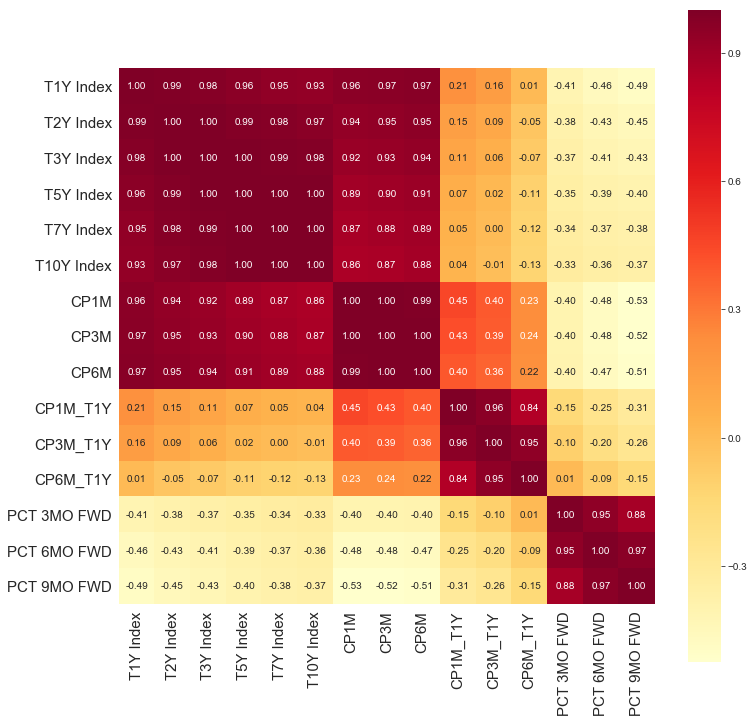

In [173]:
corr = df.corr()
fig = plt.gcf()
fig.set_size_inches(12, 12)
plt.tick_params(labelsize = 15)
sns.heatmap(corr,
            cmap = 'YlOrRd',
            square = True,
            fmt = '.2f',
            annot = True,
            annot_kws = {'size':10},)
plt.show()

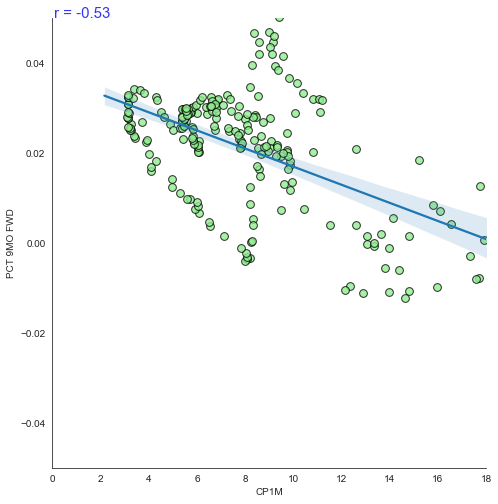

In [174]:
sns.set_style("white")
sns.lmplot(x = "CP1M", y = "PCT 9MO FWD",
                     data = df,
                     height = 7,
                     scatter_kws=dict(s=60, linewidths=1, color='lightgreen',edgecolors='black'))
plt.xlabel('CP1M')
plt.ylabel('PCT 9MO FWD')
plt.xlim([0,18])
plt.ylim([-0.05,0.05])
plt.text(0.05, 0.05, "r = -0.53", size = 15, alpha = 0.8, color = 'blue')
plt.show()

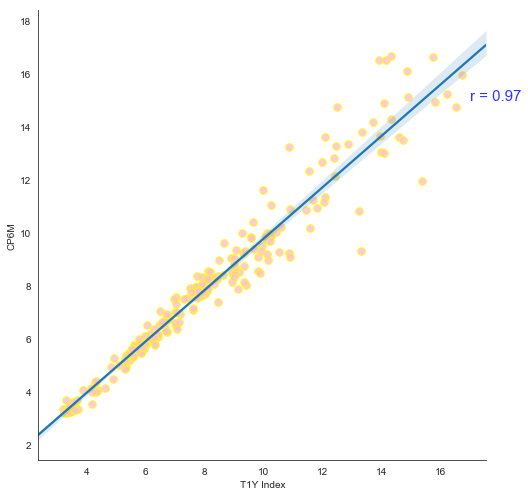

In [175]:
sns.set_style("white")
sns.lmplot(x='T1Y Index', y="CP6M",
                     data=df,
                     height=7,
                     robust=True,
                     palette='Set1',
                     scatter_kws=dict(s=60, linewidths=1, color='pink',edgecolors='yellow'))
plt.xlabel('T1Y Index')
plt.ylabel('CP6M')
plt.text(17, 15, "r = 0.97", size = 15, alpha = 0.8, color='blue')
plt.show()

r = -0.15


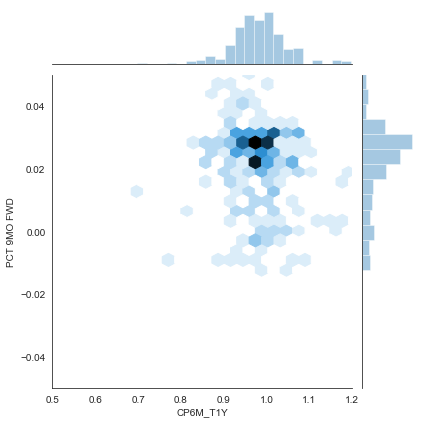

In [176]:
sns.jointplot('CP6M_T1Y','PCT 9MO FWD', data = df, kind = "hex", xlim=[0.5,1.2],ylim=[-0.05,0.05])
print('r = -0.15')

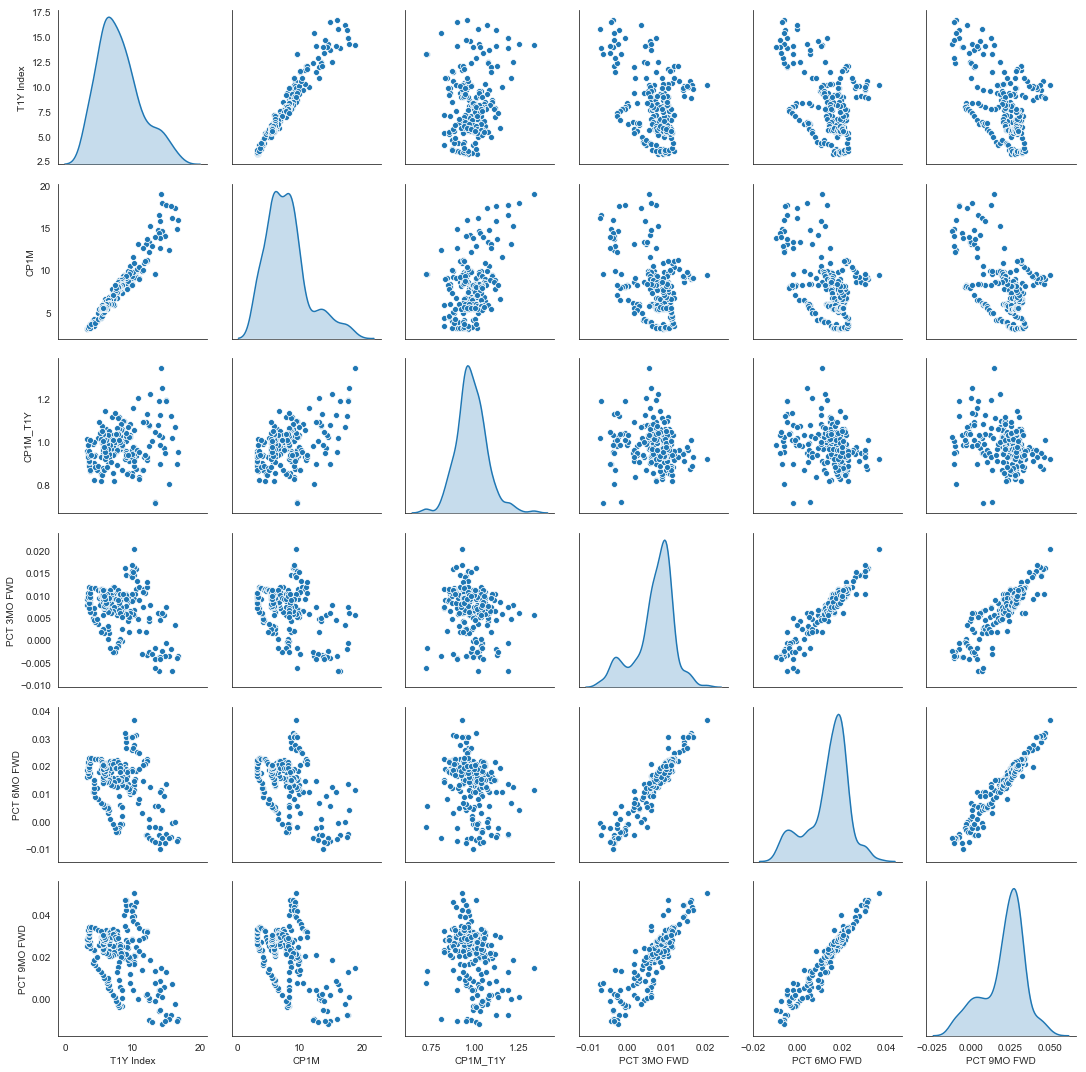

In [177]:
sns.pairplot(df[['T1Y Index', 'CP1M', 'CP1M_T1Y', "PCT 3MO FWD", "PCT 6MO FWD", "PCT 9MO FWD"]], diag_kind="kde")

### Split the data

Here, we predict the percentage change in the index 9 month ahead. 

In [259]:
X = df.iloc[:, :-3].values
y3 = df.iloc[:, -1:].values
y_binned =[int(j<0) for j in y3]
X_train, X_test, y_train, y_test = train_test_split(X, y3, test_size=0.2,stratify=y_binned)

# Preprocessing

### Standardization

In [260]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

### Display the Explained Variance Ratio for All Components

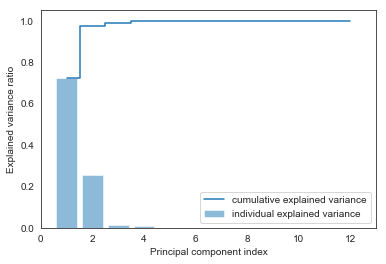

In [261]:
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse = True)]

cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1,13), var_exp, alpha = 0.5, align = 'center',
        label = 'individual explained variance')
plt.step(range(1,13), cum_var_exp, where = 'mid',
        label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc = 'best')
plt.show()

### Perform PCA

In [262]:
pca = PCA(n_components = 4)
pca.fit(X_train_std)
X_train_pca = pca.transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

### Display the Explained Variance Ratio for the 4 Components

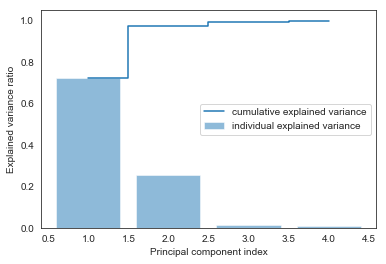

In [263]:
plt.bar(range(1, 5), pca.explained_variance_ratio_, alpha = 0.5, align = 'center',
       label = 'individual explained variance')
plt.step(range(1, 5), np.cumsum(pca.explained_variance_ratio_), where = 'mid',
    label = 'cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc = 'best')
plt.show()

# Model Fitting and Evaluation

### Linear Regression

In [264]:
lr = LinearRegression()
lr.fit(X_train_pca, y_train)
lr_train_pred = lr.predict(X_train_pca)
lr_test_pred = lr.predict(X_test_pca)

print('R^2 train: %f, test: %f' % (
        r2_score(y_train, lr_train_pred),
        r2_score(y_test, lr_test_pred)))

R^2 train: 0.290109, test: 0.403430


### Ridge Regression

In [265]:
ridge = Ridge()
ridge.fit(X_train_pca, y_train)
ridge_train_pred = ridge.predict(X_train_pca)
ridge_test_pred = ridge.predict(X_test_pca)
print('R^2 train: %f, test: %f' % (
           r2_score(y_train, ridge_train_pred),
           r2_score(y_test, ridge_test_pred)))

R^2 train: 0.290048, test: 0.400519


# Lasso Regression

In [266]:
lasso = Lasso()
lasso.fit(X_train_pca, y_train)
lasso_train_pred = lasso.predict(X_train_pca)
lasso_test_pred = lasso.predict(X_test_pca)

print('R^2 train: %f, test: %f' % (
           r2_score(y_train, lasso_train_pred),
           r2_score(y_test, lasso_test_pred)))

R^2 train: 0.000000, test: -0.001043


### ElasticNet Regression

In [267]:
eln = ElasticNet()
eln.fit(X_train_pca, y_train)
eln_train_pred = eln.predict(X_train_pca)
eln_test_pred = eln.predict(X_test_pca)
print('R^2 train: %f, test: %f' % (
           r2_score(y_train, eln_train_pred),
           r2_score(y_test, eln_test_pred)))

R^2 train: 0.000000, test: -0.001043


### DecisionTree Regressor

In [299]:
dt = DecisionTreeRegressor()
dt.fit(X_train_pca, y_train)
dt_train_pred = dt.predict(X_train_pca)
dt_test_pred = dt.predict(X_test_pca)
print('R^2 train: %f, test: %f' % (
           r2_score(y_train, dt_train_pred),
           r2_score(y_test, dt_test_pred)))

R^2 train: 0.999934, test: 0.560461


# Hyperparameter Tuning

### Hyperparameter Tuning for Ridge Model:

In [296]:
parameters = {'alpha': np.arange(0, 1, 0.01)}
cv1 = GridSearchCV(Ridge(), param_grid = parameters)
cv1.fit(X_train_pca,y_train)
cv1_train_pred = cv1.predict(X_train_pca)
cv1_test_pred = cv1.predict(X_test_pca)
print('R^2 train: %f, test: %f' % (
           r2_score(y_train, cv1_train_pred),
           r2_score(y_test, cv1_test_pred)))

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


R^2 train: 0.290049, test: 0.400547


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Hyperparameter Tuning for DecisionTree Regressor:

In [300]:
parameters = {'max_depth': range(10,100)}
cv2 = GridSearchCV(DecisionTreeRegressor(), param_grid = parameters)
cv2.fit(X_train_pca, y_train)
cv2_train_pred = cv2.predict(X_train_pca)
cv2_test_pred = cv2.predict(X_test_pca)
print('R^2 train: %f, test: %f' % (
           r2_score(y_train, cv2_train_pred),
           r2_score(y_test, cv2_test_pred)))

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


R^2 train: 0.999934, test: 0.584671


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# Ensembling

### Random Forest Regressor

In [287]:
rf = RandomForestRegressor()
rf.fit(X_train_pca, np.ravel(y_train))
rf_train_pred = rf.predict(X_train_pca)
rf_test_pred = rf.predict(X_test_pca)
print('R^2 train: %f, test: %f' % (
           r2_score(y_train, rf_train_pred),
           r2_score(y_test, rf_test_pred)))

R^2 train: 0.918447, test: 0.652334


//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Hyperparameter Tuning for Random Forest:

In [272]:
estimator_space=range(100,200,10)
parameters = {'n_estimators':estimator_space}
cv3 = GridSearchCV(RandomForestRegressor(oob_score=True), param_grid = parameters,n_jobs=-1)
cv3.fit(X_train_pca, np.ravel(y_train))

y3_test_pred=cv3.predict(X_test_pca)

y3_train_pred=cv3.predict(X_train_pca)


print("test set R2 for predicting the percent change in the USHPCI in nine months is %f " % r2_score(y_test,y3_test_pred))
print("train set R2 for predicting the percent change in the USHPCI in nine months is %f " % r2_score(y_train,y3_train_pred))
print("the best n_estimators for predicting the percent change in the USHPCI in nine months is %f " % cv3.best_params_['n_estimators'])


//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


test set R2 for predicting the percent change in the USHPCI in nine months is 0.673300 
train set R2 for predicting the percent change in the USHPCI in nine months is 0.943063 
the best n_estimators for predicting the percent change in the USHPCI in nine months is 150.000000 
